<h1><center> Phytoplankton Blooming Shifts in Response to Climate Change </center></h1>
<h3><center> - A modelling study of the Arctic flowers</center></h3>

<center><figure>
<img src="phytoplankton_microscope.jpg" style="width:80%">
</figure><center>

<center><h4>By Stian Dammann<h4><center>

<p style="page-break-after:always;"></p>

## Abstract

<font size="3">
Phytoplankton constitutes the largest branch of the carbon cycle in the Arctic, and is responsible for several secondary biological, ecological geochemical and atmospheric interactions. However, the Arctic is changing at a rate greater than seen anywhere else on Earth and much is still unknown about the ecological response to rapidly increasing ocean temperatures and decreasing sea ice extent in the Arctic. A better comprehension of the changes to Arctic net primary production and its seasonal cycles is required to improve our assessments of the changing Arctic. It is a crucial part to understand both ecological and biological responses, as well as Polar carbon cycle and changes to the cloud regimes and interactions.
<font>

<font size="3">
This study investigates the Northern Barents phytoplankton response to the historical and 1% CO$_2$ experiments in the two CMIP6 models NorESM2 and CESM2. A pronounced shift toward earlier blooming is found in the whole domain in both models and experiments. We find strong correlations between the blooming date and both sea ice breakup date and sea surface temperatures for various months, but connection to mixed layer depths remains elusive.
</font>

<p style="page-break-after:always;"></p>

## Introduction

In response to increased anthropogenic emissions of greenhouse gases Earth is warming at rates unprecedented in paleoclimate records. Since 1981, the temperature has been found to increase by approximately 0.18 $^\circ$C per decade globally. The Arctic has observed a particularly pronounced temperature increase and warms approximately four times faster than the global average, leading to a rapid Arctic sea ice retreat. Over the past 30 years, Arctic sea ice has been reduced by approximately 13% per decade, which in turn acts to accelerate the Arctic warming through the albedo effect (Hancock, 2022).

The Barents sea, the oceanic basin confined by the coast of Northern Norway, Svalbard, Frans Josefs land and the Kola peninsula, has been found to warm faster than any other place on Earth with as much as 7 times the global average (Isaksen et al. 2021). The sea is vital for several important fish stocks such as the Arctic cod, cappelin and haddock which use the area both for feeding ground and spawning. The region is also rich in plankton compared to other Arctic seas. Zooplankton such as krill form the base diet for much of the marine life, as visualized in Figure 1 through red arrows (Verity etal, 2002). 

<figure><center>
<img src="ArcticFoodWeb.png" style="width:50%">
<figcaption align = "right"> Figure 1: Schematic of the Arctic food web </figcaption>
<center></figure>

Increased ocean temperatures and decreased sea ice extent can both have profound impacts on marine life and ecosystems. The Arctic food web is complex and interdependent (Fig. 1), with many species relying on a habitat on, within or in proximity to sea ice for survival. On the other hand, some species may also be inhibited by the presence of the sea ice. One such example is the phytoplankton which is the largest marine primary producer in the Arctic. Through photosynthesis their production is thus largely controlled by the amount of incoming solar radiation. A reduction in sea ice cover may thus provide a larger area over which the plankton can reside and photosynthesize, and changes to the sea ice early in the growing season in particular may influence the timing of the spring peak (Palmera etal, 2014).

Phytoplankton are grazed upon by zooplankton, which in turn provides food for fish stocks. Fish stocks are subsequently feeding the larger marine and terrestrial mammals such as seals and polar bears in addition to marine birds. Phytoplankton also produce large amounts of dimethyl sulphates (DMS) which has been found to have large impacts on the local atmospheric processes through cloud interactions. It is thus vitally important to understand how phytoplakton will be affected by Arctic climate change, both in terms of ecosystem responses, atmospheric influences and climatic feedbacks (Charlson etal, 1987).


Phytoplankton exhibit a distinct seasonal pattern controlled by incoming sunlight, availability of nutrients and competition from grazers amongst other factors. The period between late autumn to early spring is within the Polar night in the Arctic and the primary production is zero due to a lack of solar energy. When the sun is back in early to mid spring photosynthesis can restart, provided the ocean surface is not covered by sea ice to block out the sun. Phytoplankton are able to reproduce extremely rapidly under right conditions but the growth is insustainable over time due to limited supply of nutrients. The late spring to early summer production blooming is thus depleted shortly after, enhanced by a growing population of zooplankton which graze on the primary producers (Rat'kova \& Wassmann, 2002).

This report aims to address response of the Peak Phytoplankton Blooming (PPB) date in response to climate change in two Earth System Models (ESM): the second generation Norwegian ESM at low resolution (NorESM2-LM) and the second generation Community ESM (CESM2). For both models, two climate experiments will be assessed - the historical experiment and the 1% CO$_2$ experiment. The main focus will be on exploring whether the models predict an earlier PPB in the Northern half of the Barents sea, as this is where we see the largest sea ice concentration reduction. Correlation and regression based analysis will subsequently be applied to investigate which climatic factors could be important in the models to determine when the PPB occurs in both high and low CO$_2$ climate states.

## Methods

### Setting up the environment

The programming language Python is used for data analysis in this project. External and publically available modules used are imported as the following below. 

In [1]:
# For data handling
import numpy as np, xarray as xr, pandas as pd, pandas as pd, math, os

# For plotting
import cartopy.crs as ccrs, matplotlib.pyplot as plt, matplotlib as mpl

# For faster computations and parallelization
import dask.array as da                                                  
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster

# For calender handling
from datetime import datetime, timedelta                                   

Some functions are useful in the jupyter environment for a cleaner notebook.

In [2]:
# To ignore deprication warnings (do not use when developing)
import warnings
warnings.filterwarnings("ignore")

# For compiling tex
plt.rcParams["text.usetex"] = True 

# To auto-reload modules
%load_ext autoreload
%autoreload 2               

Some functions and methods were developed specifically to apply for this project. These are stored in the separate python file 'utils.py', which is imported below.

In [3]:
# Custom helper functions
from utils import * 

Parallelization utillizing the dask module was applied when performing calculations in this project to increase efficience. This is set up and applied below.

In [6]:
# For parallelization
from dask.distributed import Client, LocalCluster  
cluster = LocalCluster(n_workers=8, memory_limit='16GB')   
client = Client(cluster)

### Getting the data

For this project, data from the NorESM2-LM and CESM2 experiments 'historical' and the 1% CO$^2$ will be analysed. The historical experiment aims to reproduce the climate evolution since pre-industrial times (1850-2014) by prescribing greenhouse gas emissions from historical observations. The 1% CO$_2$ experiment, on the other hand, starts with a climate in equilibrium comparable to the pre-industrial climate and simulates the response with emissions set to 1% of the global atmospheric CO$_2$ yearly. After 150 years of simulation, we thus end up at 

$$
[\text{CO}_2]_{end} = [\text{CO}_2]_{start} * 1.01^{150} \approx 4.4[\text{CO}_2]_{start}
$$

This experiment thus ends up at the same atmospheric CO$^2$ concentration as the 4xCO$^2$ experiment and we thus expect much stronger signals than with historical.

It is assumed that output data from CESM2 and NorESM2-LM is available locally prior to running this code. In this case, each variable is downloaded and stored as with the filenames shown below. Each dataset is clipped to the larger Barents area to reduce storage space needed. The variables used in this analysis are daily outputs of 'chlos' (surface chlorophyll concentration in kg/m$^3$), 'siconc' (sea ice consentration in %), 'tos' (sea surface tempearture in Kelvin) and 'omldamax' (ocean mixed layed depth in meters).

In [34]:
hist_to_use = [
    'chlos_clipped_Oday_NorESM2-LM_historical_r1i1p1f1_gn_18500102-20150101.nc', 
    'chlos_clipped_Oday_CESM2_historical_r1i1p1f1_gn_18500102-20150101.nc', 
    'siconc_clipped_SIday_NorESM2-LM_historical_r1i1p1f1_gn_18500102-20150101.nc', 
    'siconc_clipped_SIday_CESM2_historical_r1i1p1f1_gn_18500102-20150101.nc', 
    'tos_clipped_Oday_NorESM2-LM_historical_r1i1p1f1_gn_18500102-20150101.nc', 
    'tos_clipped_Oday_CESM2_historical_r1i1p1f1_gn_18500102-20150101.nc',
    'omldamax_clipped_Oday_NorESM2-LM_historical_r1i1p1f1_gn_18500102-20150101.nc', 
    'omldamax_clipped_Oday_CESM2_historical_r1i1p1f1_gn_18500102-20150101.nc'
]
pct_to_use = [
    'chlos_clipped_Oday_NorESM2-LM_1pctCO2_r1i1p1f1_gn_00010101-01501231.nc',
    'chlos_clipped_Oday_CESM2_1pctCO2_r1i1p1f1_gn_00010102-01510101.nc',
    'siconc_clipped_SIday_NorESM2-LM_1pctCO2_r1i1p1f1_gn_00010101-01501231.nc',
    'siconc_clipped_SIday_CESM2_1pctCO2_r1i1p1f1_gn_00010102-01510101.nc',
    'tos_clipped_Oday_NorESM2-LM_1pctCO2_r1i1p1f1_gn_00010101-01501231.nc',
    'tos_clipped_Oday_CESM2_1pctCO2_r1i1p1f1_gn_00010102-01510101.nc',
    'omldamax_clipped_Oday_NorESM2-LM_1pctCO2_r1i1p1f1_gn_00010101-01501231.nc',
    'omldamax_clipped_Oday_CESM2_1pctCO2_r1i1p1f1_gn_00010102-01510101.nc'
]

DataArrays are given names according to the following standard:
- First letter according to variable name: c = chlorophyll, i = sea ice concentration, t = SST, m = mixed layer depth
- Second letter denotes the model: C = CESM2, N = NorESM2
- Third letter denotes the experiment: h = historical, p = 1% CO$^2$

For reading the data, the xarray modules is used. xarray is a powerful tool to read and analyse large, multidimensional datasets, which provides a wide range of data management and processing tools. The custom function 'read_from_file' applied here clips the data to only include the northern half of the Barents sea (north of 75$^\circ$N), changes the time index to use the Datetime Python module, changes names of coordinates to be consistent, and clips the data to only include full years to avoid scewed seasonal statistics.

In [5]:
das_hist = []
for hist in hist_to_use:
    das_hist.append(read_from_file(hist))
cNh, cCh, iNh, iCh, tNh, tCh, mNh, mCh = das_hist

In [6]:
das_pct = []
for pct in pct_to_use:
    das_pct.append(read_from_file(pct))
cNp, cCp, iNp, iCp, tNp, tCp, mNp, mCp = das_pct

### Calculations

##### Regional Means

For computations of the regional mean values the custom function 'regional_average' was applied. It imports the 'areacello' dataset from the respective model and uses it to weight the averaging to account for the unequal areas of each model gridcell. The standard deviation between the grid cells in the region for each year is also calculated and reported. The function is used several times below.

##### Peak Phytoplankton Blooming Dates

In this study, the phytoplankton blooming date is defined as the day of year where the ocean surface chlorophyll concentration is at its maximum. Chlorophyll is thus used as a proxy for the phytoplankton activity with the reasoning that phytoplankton are by far the largest primary producers in the marine arctic. The 'peak' method of finding the primary phytoplankton blooming date assumes a monomodal behaviour of the seasonal production cycle. Although this is not always the case seeing as a second late summer blooming also may occur, both models show a clear tendency of a very dominant first blooming response which ensures robust results from the method. The method is implemented in the custom function 'find_peak_dates', and is applied below.

In [7]:
cNh_dates_mean, cNh_dates_std, cNh_dates = regional_average(
    find_peak_dates(cNh), 
    model='NorESM2-LM', 
    std=True, 
    suppress_feedback=True, 
    keep_org=True
)
cNp_dates_mean, cNp_dates_std, cNp_dates = regional_average(
    find_peak_dates(cNp), 
    model='NorESM2-LM', 
    std=True, 
    suppress_feedback=True, 
    keep_org=True
)
cCh_dates_mean, cCh_dates_std, cCh_dates = regional_average(
    find_peak_dates(cCh), 
    model='CESM2', 
    std=True, 
    suppress_feedback=True, 
    keep_org=True
)
cCp_dates_mean, cCp_dates_std, cCp_dates = regional_average(
    find_peak_dates(cCp), 
    model='CESM2', 
    std=True, 
    suppress_feedback=True, 
    keep_org=True
)

##### Sea Ice Breakup Dates

Another important measure in this study is the sea ice breakup date (SIBD). SIBD is defined here as the date where the sea ice concentration first falls below a pre-set threshold. Thresholds of 50%, 80% and 90% are applied and used here, and will hereby be referred to as SIBD50, SIBD80 and SIBD90, respectively. To calculate the SIBD the custom fucntion 'find_first_dates' is applied. It works by cutting away all dates after a set threshold, eg. the sea ice minimum in September 16, to avoid complications of irrelevant dates. It subsequently cuts out all values above (below) the threshold and finds the date of the maximum (minimum) in the remaining data. This procedure may fail if the decrease (increase) of the variable is not monotonic through the given season, but works well for variables where the daily variations are not too large such as with sea ice.

In [8]:
# Keeps also spatial information (non-mean) for plotting
iNh_SIBD50_mean, iNh_SIBD50_std, iNh_SIBD50 = regional_average(
    find_first_dates(iNh, 50, over=False), 
                     model='NorESM2-LM', 
                     std=True, 
                     suppress_feedback=True, 
                     keep_org=True)
iNp_SIBD50_mean, iNp_SIBD50_std, iNp_SIBD50 = regional_average(
    find_first_dates(iNp, 50, over=False), 
                     model='NorESM2-LM', 
                     std=True, 
                     suppress_feedback=True, 
                     keep_org=True)
iCh_SIBD50_mean, iCh_SIBD50_std, iCh_SIBD50 = regional_average(
    find_first_dates(iCh, 50, over=False), 
                     model='CESM2', 
                     std=True, 
                     suppress_feedback=True, 
                     keep_org=True)
iCp_SIBD50_mean, iCp_SIBD50_std, iCp_SIBD50 = regional_average(
    find_first_dates(iCp, 50, over=False), 
                     model='CESM2', 
                     std=True, 
                     suppress_feedback=True, 
                     keep_org=True)

In [9]:
iNh_SIBD80_mean = regional_average(find_first_dates(iNh, 80, over=False),
                                   model='NorESM2-LM', suppress_feedback=True)
iNp_SIBD80_mean = regional_average(find_first_dates(iNp, 80, over=False),
                                   model='NorESM2-LM', suppress_feedback=True)
iCh_SIBD80_mean = regional_average(find_first_dates(iCh, 80, over=False),
                                   model='CESM2', suppress_feedback=True)
iCp_SIBD80_mean = regional_average(find_first_dates(iCp, 80, over=False),
                                   model='CESM2', suppress_feedback=True)

In [10]:
iNh_SIBD90_mean = regional_average(find_first_dates(iNh, 90, over=False), 
                                   model='NorESM2-LM', suppress_feedback=True)
iNp_SIBD90_mean = regional_average(find_first_dates(iNp, 90, over=False),
                                   model='NorESM2-LM', suppress_feedback=True)
iCh_SIBD90_mean = regional_average(find_first_dates(iCh, 90, over=False), 
                                   model='CESM2', suppress_feedback=True)
iCp_SIBD90_mean = regional_average(find_first_dates(iCp, 90, over=False),
                                   model='CESM2', suppress_feedback=True)

##### Mean Monthly Sea Surface Temperatures and Mixed Layer Depths

For the Sea Surface Temperature (SST) the same method was applied to find the date where the SST first crosses 0$^\circ$C, but variations were found to be too large to for this method to yield reliable results, both temporally (day-to-day variations) and spatially (particularly between North and South). This study will therefore rather look at the mean monthly temperature each year for the months May, June and July. This is calculated below using the custom function 'monthly_mean'.

In [13]:
tNh_June_mean, tNh_June_std = monthly_mean(tNh, 6, model='NorESM2-LM', 
                                           suppress_feedback=True, std=True)
tNp_June_mean, tNp_June_std = monthly_mean(tNp, 6, model='NorESM2-LM', 
                                           suppress_feedback=True, std=True)
tCh_June_mean, tCh_June_std = monthly_mean(tCh, 6, model='CESM2', 
                                           suppress_feedback=True, std=True)
tCp_June_mean, tCp_June_std = monthly_mean(tCp, 6, model='CESM2', 
                                           suppress_feedback=True, std=True)

# Need also June spatial results for map anomaly plot
tNh_June = monthly_mean(tNh, 6, regional_mean=False)
tNp_June = monthly_mean(tNp, 6, regional_mean=False)
tCh_June = monthly_mean(tCh, 6, regional_mean=False)
tCp_June = monthly_mean(tCp, 6, regional_mean=False)

For Mixed Layer Depth (MLD), the mean monthly values for May, June and July were also used to investigate its impact on the PPB dates. 

In [14]:
mNh_May_mean, mNh_June_mean, mNh_July_mean = [
    regional_average(
        monthly_mean(mNh, i, regional_mean=False), 
        model='NorESM2-LM', suppress_feedback=True) for i in range(5, 8)]
mNp_May_mean, mNp_June_mean, mNp_July_mean = [
    regional_average(
        monthly_mean(mNp, i, regional_mean=False), 
        model='NorESM2-LM', suppress_feedback=True) for i in range(5, 8)]
mCh_May_mean, mCh_June_mean, mCh_July_mean = [
    regional_average(
        monthly_mean(mCh, i, regional_mean=False), 
        model='CESM2', suppress_feedback=True) for i in range(5, 8)]
mCp_May_mean, mCp_June_mean, mCp_July_mean = [
    regional_average(
        monthly_mean(mCp, i, regional_mean=False), 
        model='CESM2', suppress_feedback=True) for i in range(5, 8)]

# Need also June spatial results for map anomaly plot
mNh_May = monthly_mean(mNh, 5, regional_mean=False)
mNp_May = monthly_mean(mNp, 5, regional_mean=False)
mCh_May = monthly_mean(mCh, 5, regional_mean=False)
mCp_May = monthly_mean(mCp, 5, regional_mean=False)

#### Anomalies

The custom function 'time_anomaly' is used to calculate anomalies for the data. For this purpose the anomalies will be defined as the difference between the last and the first 30 year averages of the simulation.

In [15]:
cNh_dates_anomaly = time_anomaly(cNh_dates, 0, 30, -30, -1)
cNp_dates_anomaly = time_anomaly(cNp_dates, 0, 30, -30, -1)
cCh_dates_anomaly = time_anomaly(cCh_dates, 0, 30, -30, -1)
cCp_dates_anomaly = time_anomaly(cCp_dates, 0, 30, -30, -1)

In [16]:
iNh_SIBD50_anomaly = time_anomaly(iNh_SIBD50, 0, 30, -30, -1)
iNp_SIBD50_anomaly = time_anomaly(iNp_SIBD50, 0, 30, -30, -1)
iCh_SIBD50_anomaly = time_anomaly(iCh_SIBD50, 0, 30, -30, -1)
iCp_SIBD50_anomaly = time_anomaly(iCp_SIBD50, 0, 30, -30, -1)

In [17]:
tNh_June_anomaly = time_anomaly(tNh_June, 0, 30, -30, -1)
tNp_June_anomaly = time_anomaly(tNp_June, 0, 30, -30, -1)
tCh_June_anomaly = time_anomaly(tCh_June, 0, 30, -30, -1)
tCp_June_anomaly = time_anomaly(tCp_June, 0, 30, -30, -1)

In [18]:
mNh_June_anomaly = time_anomaly(mNh_May, 0, 30, -30, -1)
mNp_June_anomaly = time_anomaly(mNp_May, 0, 30, -30, -1)
mCh_June_anomaly = time_anomaly(mCh_May, 0, 30, -30, -1)
mCp_June_anomaly = time_anomaly(mCp_May, 0, 30, -30, -1)

## Results & Discussion

### Anomalies

The dates for peak phytoplankton blooming, as well as for sea ice breakup, mean June SSt's and mean May MLD, was calculated above for each grid cell in the Northern Barents sea domain separately. It is thus useful to see how each specific location in the region is predicted by the models to change with time as response to the climate forcing from prescribed emissions. In Figure 2 we see the results from both the historical and the 1% CO$_2$ experiments. 

In the upper panels we see that both NorESM2 and CESM2 show a strong historical shift in the peak phytoplankton blooming of up to 20 days earlier in the season. NorESM2 shows a stronger historical response over a larger area than CESM2 for both PPB, SIB and mean June SST, but both models agree fairly well on the sign of the response in all variables. For mean May MLD, on the other hand, CESM2 shows a strong decrease over the majority of the domain which is not seen in NorESM2. The latter predicts a spatially varient response, with significant increase to the south and weaker decrease toward the middle and north of the domain.

***

In [19]:
anomalies_hist = [cNh_dates_anomaly, cCh_dates_anomaly, 
                  iNh_SIBD50_anomaly, iCh_SIBD50_anomaly,
                  tNh_June_anomaly, tCh_June_anomaly, 
                  mNh_June_anomaly, mCh_June_anomaly]
anomalies_pct = [cNp_dates_anomaly, cCp_dates_anomaly, 
                 iNp_SIBD50_anomaly, iCp_SIBD50_anomaly,
                 tNp_June_anomaly, tCp_June_anomaly, 
                 mNp_June_anomaly, mCp_June_anomaly]

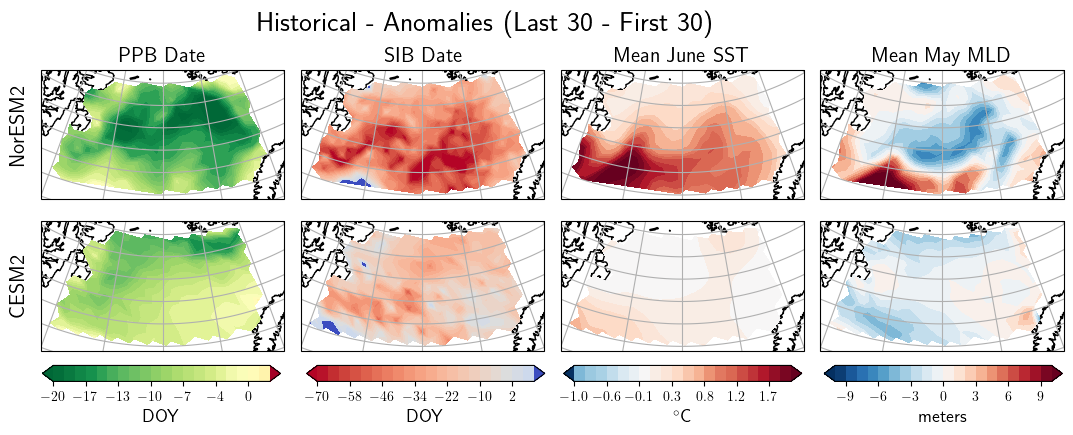

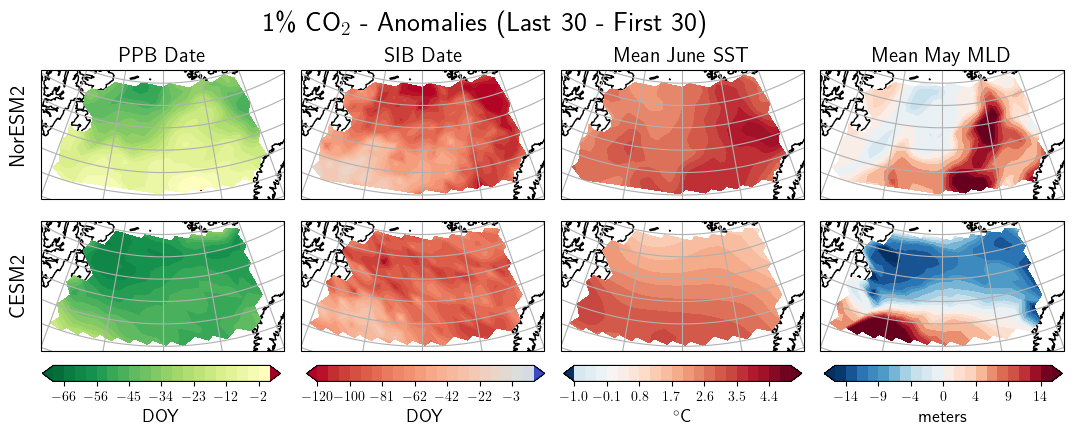

In [22]:
levels = [np.linspace(-20, 2, 21).round(0), 
          np.linspace(-70, 10, 21).round(0), 
          np.linspace(-1, 2, 21).round(1), 
          np.linspace(-10, 10, 21).round(0)]
anomaly_plot(anomalies_hist, 'Historical', levels=levels)
levels = [np.linspace(-70, 2, 21).round(0), 
          np.linspace(-120, 10, 21).round(0), 
          np.linspace(-1, 5, 21).round(1), 
          np.linspace(-15, 15, 21).round(0)]
anomaly_plot(anomalies_pct, '1\% CO$_2$', levels=levels)

**Figure 2:** Anomalies from the 1% CO$_2$ experiment (bottom 2 panels) and the historical simulation (upper 2 panels). Panels show Peak     Phytoplankton Blooming date (left panels), 50% Sea Ice Breakup date (middle, left panels), mean June sea surface temperature (middle, right panels) and mean May mixed layer depth (right panels). Upper panels are from NorESM2, lower panels are from CESM2. Anomalies are here computed as the difference between the last 30 and the first 30 years of simulation run. 
***

In the lower panels we see the results from the 1% CO$_2$ experiment. The forcing over the time span of the simulation in this experiment is much larger than in the historical run. The anomalies are thus much larger than seen in the upper panels for all variables. The shift in PPB is stronger here stronger in CESM2 with a change in blooming of more than 2 months in some parts of the region. The change in SIB date also shows the rapid sea ice depletion with such strong climate forcing, with a SIB date more than 3 months earlier in large parts of the domain. The fairly weak response of mean June SST in the historical CESM2 simulation is now much more prominent with a warming of up to 4 $^\circ$C. Changes to mean May MLD remains more complex with a strong difference between north (shallowing) and south (deepening) in CESM2, whereas NorESM2 predicts a deepening of the upper ocean mixed layer almost everywhere.

### Trend Analysis of Peak Blooming in the Northern Barents

For statistical analysis and interpretations of phytoplankton evolution in the whole Northern Barents sea the regional means are computed. Note that year numbers in the 1% CO$_2$ experiments are arbitrary, since they are not forced with realistic emission scenarios based on anything in nature. From hereon they are set to end in 2014, in order to match the historical experiment, but should not be interpreted further. 

In Figure 3 we see again a shift in the PPB dates, particularly with the 1% CO$_2$ runs and with the last 50-60 years of the historical simulations. Linear regression performed on the last 60 years of the historical simulations show trends of -4.7 and -2.7 days per decade for NorESM and CESM, respectively, which are both significant to the 95\% confidence level. This is similar to what is seen with the Japanese cherry blossoms in Kyoto, Japan where the flowers are blooming ealier in the season due to increased air temperatures (Samenow, 2021). 

***

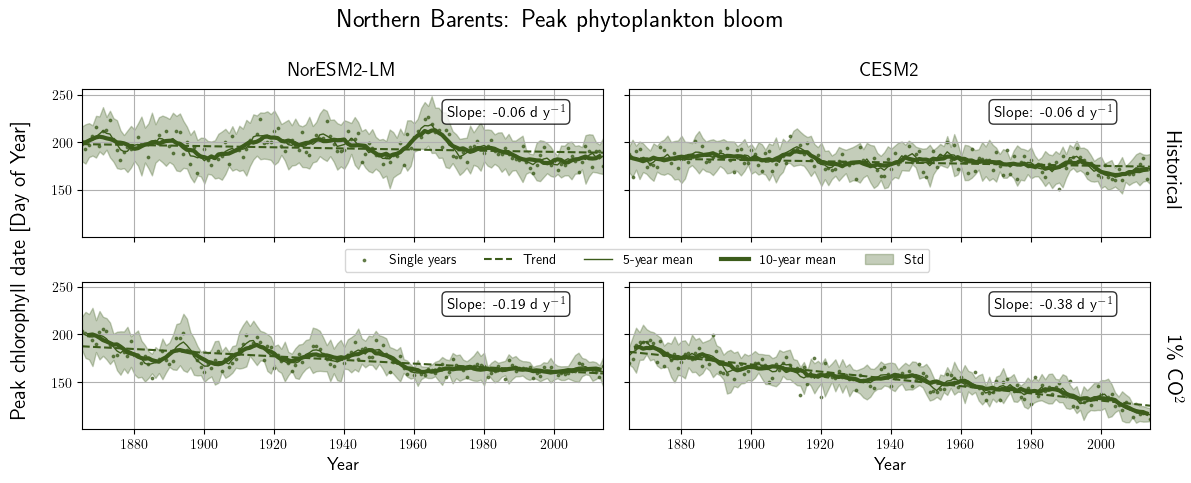

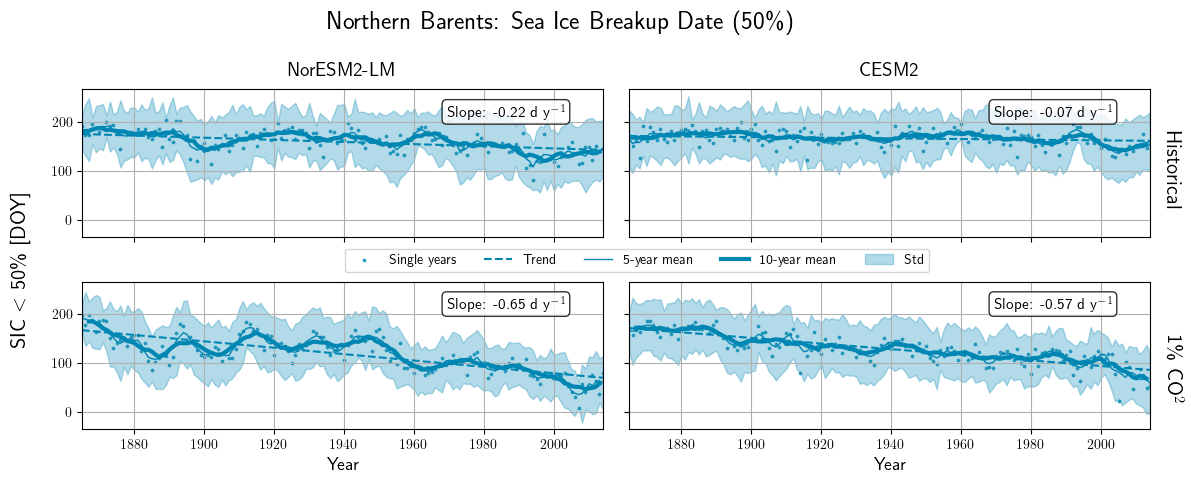

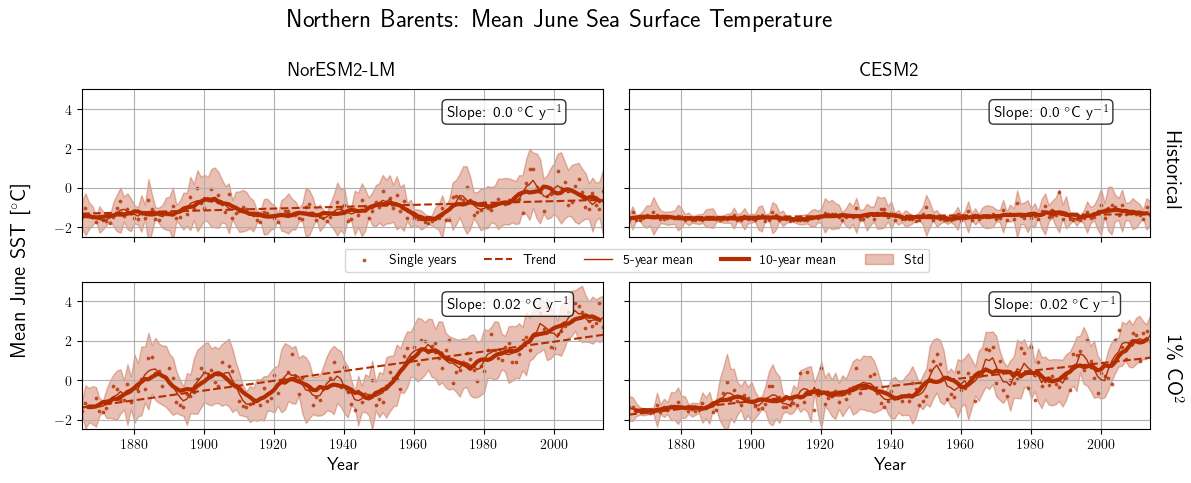

In [29]:
fig, axs = plt.subplots(nrows=2, ncols=2, 
                        figsize=(12,4), sharex=True, sharey=True)
axs = axs.flatten()
[axs[i].set_xlim(1865, 2014) for i in range(4)]

regNh = scatter_dates(cNh_dates_mean, last_n_years=150, 
                      ax=axs[0], reg_results=True, 
                      color='#3C5C1B', anomaly=False, 
                      std=cNh_dates_std)

regNp = scatter_dates(cNp_dates_mean, last_n_years=150, 
                      ax=axs[2], reg_results=True,
                      color='#3C5C1B', anomaly=False, 
                      std=cNp_dates_std)

regCh = scatter_dates(cCh_dates_mean, last_n_years=150, 
                      ax=axs[1], reg_results=True, 
                      color='#3C5C1B', anomaly=False, 
                      std=cCh_dates_std)

regCp = scatter_dates(cCp_dates_mean, last_n_years=150, 
                      ax=axs[3], reg_results=True, 
                      color='#3C5C1B', anomaly=False, 
                      std=cCp_dates_std)

scatter_dates_layout(regNh, regCh, regNp, regCp, fig, axs)

#----------------------------------------------------------------------------------------
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,4), 
                        sharex=True, sharey=True)
axs = axs.flatten()
[axs[i].set_xlim(1865, 2014) for i in range(4)]

regNh = scatter_dates(iNh_SIBD50_mean, last_n_years=150, 
                      ax=axs[0], reg_results=True, 
                      color='#0086b3', anomaly=False, 
                      std=iNh_SIBD50_std)

regNp = scatter_dates(iNp_SIBD50_mean, last_n_years=150, 
                      ax=axs[2], reg_results=True, 
                      color='#0086b3', anomaly=False, 
                      std=iNp_SIBD50_std)

regCh = scatter_dates(iCh_SIBD50_mean, last_n_years=150, 
                      ax=axs[1], reg_results=True, 
                      color='#0086b3', anomaly=False, 
                      std=iCh_SIBD50_std)

regCp = scatter_dates(iCp_SIBD50_mean, last_n_years=150, 
                      ax=axs[3], reg_results=True, 
                      color='#0086b3', anomaly=False, 
                      std=iCp_SIBD50_std)

scatter_dates_layout(regNh, regCh, regNp, regCp, fig, axs, 
                    title='Northern Barents: Sea Ice Breakup Date (50\%)',
                    ylabel='SIC $<$ 50\% [DOY]')

#----------------------------------------------------------------------------------------
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,4), 
                        sharex=True, sharey=True)
axs = axs.flatten()

[axs[i].set_xlim(1865, 2014) for i in range(4)]
[axs[i].set_ylim(-2.5, 5) for i in range(4)]


regNh = scatter_dates(tNh_June_mean, last_n_years=150, 
                      ax=axs[0], reg_results=True, 
                      color='#b32d00', anomaly=False, std=tNh_June_std)

regNp = scatter_dates(tNp_June_mean, last_n_years=150, 
                      ax=axs[2], reg_results=True, 
                      color='#b32d00', anomaly=False, std=tNp_June_std)

regCh = scatter_dates(tCh_June_mean, last_n_years=150, 
                      ax=axs[1], reg_results=True, 
                      color='#b32d00', anomaly=False, std=tCh_June_std)

regCp = scatter_dates(tCp_June_mean, last_n_years=150, 
                      ax=axs[3], reg_results=True, 
                      color='#b32d00', anomaly=False, std=tCp_June_std)

scatter_dates_layout(regNh, regCh, regNp, regCp, fig, axs,
                     title='Northern Barents: Mean June Sea Surface Temperature', 
                     ylabel='Mean June SST [$^\circ$C]', 
                     slope_unit=' $^\circ$C y$^{-1}$')
plt.show()

**Figure 3:** Timeseries and trends of peak phytoplankton blooming dates (upper panels, green), 50\% sea ice breakup dates (middle panels, blue), mean June sea surface temperatures (lower panels, red). Upper panels are from the historical runs and the lower panels from the 1% CO$_2$ experiment, whereas the left panels are NorESM2 and the right panels are CESM2. Points show individual years, thin solid line shows the 5-year mean, thick solid line shows the 10-year mean, and the dashed line shows the trend calculated using the ordinary least squares linear regression. Shaded areas show one upper and lower standard deviation calculated from the yearly variations within the Barents sea domain.
***

For the 1% CO$_2$ simulation in NorESM2 we see a prominent inhomogeneity in the timeseries of both PPB date, SIB date and mean June SSTs. For all variables we see strong interannual variability with apparent approximately decadal cycles over the first 100 years of simulation. Subsequently, we see a severly rapid increase in mean June SST accompanied by a rapid and steady decrease in SIB dates and a flattening and smoothening trend in the PPB dates. 

This change in PPB date trend could be due to a shift in the phytoplankton growing regime, going from a state where blooming is limited by sea ice shading to a state where incoming spring solar radiation is more crucial. Seeing as plants are dependent sunlight for production it is possible that we get to a point where any further seasonal shift in sea ice breakup is ineffectual, if it is early enough in the season so that the sun is either too week still or below the horizon altogether during the Polar night.

The same inhomogeneity is not apparent in CESM2 where we instead see a steady decrease in both PPB dates, SIB dates and mean June SSTs throughout the 1% CO$_2$ experiment simulation. It does not seem to be limited by the same constraints as are evident in NorESM2, and the PPB date is permitted to reach peak blooming dates already in early April. 

### Correlations

The Pearson Correlation Coefficient (R-value) were calculated for the PBD dates relative to several variations of the SIB dates and the mean monthly SST's and MLD's. For SIB dates a breakup threshold of 50\%, 80\% and 90\% was used. For SST the mean monthly values for May, June, July and August were calculated, whereas for MLD only values for April and May were used. The correlation use computed for the whole timeseries of the Northern Barents sea mean for each of the models and experiments separately.

In [30]:
df_Nh = pd.DataFrame([
    cNh_dates_mean.values,
    iNh_SIBD50_mean.values, iNh_SIBD80_mean.values, iNh_SIBD90_mean.values,
    monthly_mean(tNh, 5, 'NorESM2-LM').values, monthly_mean(tNh, 6, 'NorESM2-LM').values, 
    monthly_mean(tNh, 7, 'NorESM2-LM').values, monthly_mean(tNh, 8, 'NorESM2-LM').values,
    monthly_mean(mNh, 4, 'NorESM2-LM').values, monthly_mean(mNh, 5, 'NorESM2-LM').values]).T
df_Np = pd.DataFrame([
    cNp_dates_mean.values,
    iNp_SIBD50_mean.values, iNp_SIBD80_mean.values, iNp_SIBD90_mean.values,
    monthly_mean(tNp, 5, 'NorESM2-LM').values, monthly_mean(tNp, 6, 'NorESM2-LM').values, 
    monthly_mean(tNp, 7, 'NorESM2-LM').values, monthly_mean(tNp, 8, 'NorESM2-LM').values,
    monthly_mean(mNp, 4, 'NorESM2-LM').values, monthly_mean(mNp, 5, 'NorESM2-LM').values]).T
df_Ch = pd.DataFrame([
    cCh_dates_mean.values,
    iCh_SIBD50_mean.values, iCh_SIBD80_mean.values, iCh_SIBD90_mean.values,
    monthly_mean(tCh, 5, 'CESM2').values, monthly_mean(tCh, 6, 'CESM2').values, 
    monthly_mean(tCh, 7, 'CESM2').values, monthly_mean(tCh, 8, 'CESM2').values,
    monthly_mean(mCh, 4, 'CESM2').values, monthly_mean(mCh, 5, 'CESM2').values]).T
df_Cp = pd.DataFrame([
    cCp_dates_mean.values,
    iCp_SIBD50_mean.values, iCp_SIBD80_mean.values, iCp_SIBD90_mean.values,
    monthly_mean(tCp, 5, 'CESM2').values, monthly_mean(tCp, 6, 'CESM2').values, 
    monthly_mean(tCp, 7, 'CESM2').values, monthly_mean(tCp, 8, 'CESM2').values,
    monthly_mean(mCp, 4, 'CESM2').values, monthly_mean(mCp, 5, 'CESM2').values]).T

In [41]:
index = ['NorESM2 Hist', 'CESM2 Hist', 
         'NorESM2 1%', 'CESM2  1%']
columns = ['PBD', 'SIBD50', 'SIBD80', 'SIBD90', 
           'May SST', 'June SST', 'July SST', 'Aug SST', 
           'May MLD', 'June MLD']
df_Nh.columns = df_Np.columns = df_Ch.columns =df_Cp.columns = columns
correlations = pd.DataFrame([
    df_Nh.corr().PBD[1:].values.T, df_Ch.corr().PBD[1:].values, 
    df_Np.corr().PBD[1:].values, df_Cp.corr().PBD[1:].values], 
    columns=columns[1:], index=index)

***
**Table 1:** Pearson correlation coefficients computed over every year of each timeseries, between the PBD date and the indicated variables. Coefficients closer to 1 indicate a strong positive correlation whereas coefficients closer to -1 indicate strong negative correlation. Coefficients close to 0 indicate no relationship between respective variables.

In [42]:
correlations.round(3)

,SIBD50,SIBD80,SIBD90,May SST,June SST,July SST,Aug SST,May MLD,June MLD
NorESM2 Hist,0.759,0.908,0.883,-0.804,-0.882,-0.898,-0.871,-0.386,0.037
CESM2 Hist,0.609,0.867,0.833,-0.739,-0.854,-0.908,-0.872,0.257,0.654
NorESM2 1%,0.879,0.884,0.854,-0.738,-0.832,-0.818,-0.819,-0.502,-0.167
CESM2 1%,0.909,0.928,0.859,-0.854,-0.910,-0.937,-0.942,-0.553,0.292


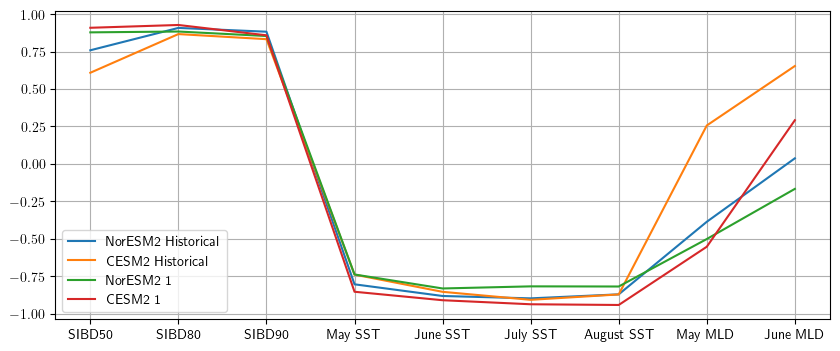

In [33]:
correlations.T.plot(kind='line', figsize=(10,4), grid=True)
plt.show()

**Figure 4:** The correlations from Table 1 visualized. Blue and orange lines represent the historical simulations in NorESM2 and CESM2, respectively, whereby green and red lines show the 1\% CO$_2$ experiment in NorESM2 and CESM2, respectively.
***

It is evident from Table 1 that the PPB date is highly correlated with both the sea ice concentration and sea surface temperature. For sea ice, it seems that the date of SIB with concentrations of 80\% as the threshold yields the highest influence across both models and experiments. This could be explained by the phytoplankton need of incoming radiation. At 50\% there may already be plenty of sunlight for phytoplankton blooming so that it is already starting before reaching this high degree of open waters. With 90\%, on the other hand, the sea ice may be able to block out enough sunlight still so that the blooming is inhibited. An in-between threshold of 80\% seems to be a good middle ground with trade-offs of early production and sufficient lighting.

For temperature we can see that the most correlated months vary among the models and experiments, but all yield a fairly strong, negative dependence meaning that higher SST's indicate earlier blooming dates. The summer months of June, July and August seem to matter the more than the last spring month of May. The 1\% CO$_2$ experiment in CESM2 shows the strongest shift in the PPB date, and it is also the one that shows the strongest correlations between PPB and SST across all months. This could mean again that the model gets to a point where sea ice retreat has come so far that  temperature and incoming sunlight are now the main controlling factors for the phytoplankton.

When it comes to MLD in May and June the results are somewhat varied, where the 4 simulations are split in two half in terms of the sign of the coefficients. All but CESM2 Historical show a negative correlation between mean May MLD, whereas all but NorESM2 1\% CO$_2$ show a positive correlation with mean June MLD. Most of these R-values are small, however, and only the mean June MLD in CESM2 Historical (R=0.65) and the mean May MLD in NorESM2 (R=-0.50) and CESM2 (R=-0.55) for 1\% CO$_2$ yield results greater than 0.5 (absolute values). The mean May and June MLD thus seems to be less important for the timing of the peak blooming, but could still be a big controlling factor for other properties such as the peak blooming duration or amplitude, or perhaps more imporantly the total annual NPP by phytoplankton.

## Conclusions

The net primary production by phytoplankton has been observed to increase in the Arctic over the past 30 years, with a particularly emphasized signal in the Barent sea. Both NorESM2 and CESM2 are able to reproduce this in simulations run with historical forcing. The increase is accompanied by a strong shift in the peak blooming date from mid summer toward early summer or late spring. With stronger forcing this shift in signal is greatly amplified, and predicted to occur more than 3 months earlier than in the pre-industrial climate in some regions of the Northern Barents.

The blooming date shift in NorESM2 seems to be more impacted by sea ice loss than CESM2, which is evident from a abruptly changing trend when the sea ice breakup occurs too early in the growing season. This was not seen in CESM2 where the blooming date trends continue rather undisturbed throught the timeseries and approaches a blooming date as early as late april. Due to the lack of sunlight in the months prior to this it would not be physically plausible with a shift much further into early spring than this, and it would therefore be interresting to see the continued trend in CESM2 with future high emission scenarios such as SSP5 8.5. 

No clear connectiong was found between the upper ocean mixed layer depth. It is likely due to the fact that nutrients are already abundent at the time of peak blooming, due to the gradual build-up during low activity winter months. It is hypothesized that mixed layer depth changes may thus be a more important factor with regards to the duration of the phytoplankton blooming as well as the total annual net primary production in the arctic, but further studies of the NorESM2 and CESM2 responses are needed to confirm this. Investigations of grid-cell specific correlations rather than correlations of regionally averaged data may also provide some more insight into the relationship between the mixed layer depth and the phytoplankton blooming.

All simulations exhibited a strong correlation between blooming date and the mean monthly sea surface temperature. Particularly the temperature in July seems to be an important factor for determining the peak blooming. To further examine the temperature dependence of phytoplankton blooming it would be interresting to look instead at the temperature at the dates leading up to the phytoplankton blooming maximum, rather than the mean temperature of a given month. This more dynamic temperature approach could possibly reveal to which extent the blooming is temperature dependent, whereas the static, mean month approach does not capture as well the changes over the timeseries. 

## Outlook

For future research it would be interresting to investigate further the impacts of the predicted shift in phytoplankton blooming, both in terms of ecological responses such as changes to the zooplankton seasonalities or the larger mammal populations, but also with respect to atmospheric influences through for the dimethyl sulphate connection. For this it could also be useful to repeat the study with various Shared Socioeconomic Pathway (SSP) scenarios to look more into what the models predict the future behavior of phytoplankton blooming to look like in the Barents sea. 

## Acknowledgements

Thanks to Kicki and Michael for hosting the Earth Systems course at the University of Oslo, allowing us to participate in the eScience cours as part of our master courses. A big thanks of course to Paul and Michael for hosting two amazing weeks with a wide range of super inspiring talks, and to the rest of the eScience participants and instructors for making the stay so memorable. A special thanks to the Plancton group and our relentless instructor Ada for the all interresting discussions and countless emergency help sessions with everything from subplots_adjust decimals to my personal xarray break-downs. 

## References

1. Isaksen, K., Nordli, Ø., Ivanov, B. et al. (2022) Exceptional warming over the Barents area. Sci Rep 12, 9371 https://doi.org/10.1038/s41598-022-13568-5

2. T. N. Rat'kova \& P. Wassmann (2002) Seasonal variation and spatial distribution of phyto- and protozooplankton in the central Barents Sea. 
https://www.sciencedirect.com/science/article/pii/S0924796302001690

3. P.G. Verity, P. Wassmann, M.E. Frischer, M.H. Howard-Jones \& A.E. Allena (2002) Grazing of phytoplankton by microzooplankton in the Barents Sea during early summer

4. L. Hancock (2022) Six ways loss of Arctic ice impacts everyone. WWF.org article 
https://www.worldwildlife.org/pages/six-ways-loss-of-arctic-ice-impacts-everyone

4. M.A. Palmer, B.T.Saenz \& K.R. Arrigo (2014) Impacts of sea ice retreat, thinning, and melt-pond proliferation on the summer phytoplankton bloom in the Chukchi Sea, Arctic Ocean

5. R.J. Charlson, J.E. Lovelock, M.O. Andreae & S.G. Warren (1987) Oceanic phytoplankton, atmospheric sulphur, cloud albedo and climate